In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/GEN_AI-Intern/Text-Generation/Translator-TF-sratch/tam.txt'

input_sentence = []
output_sentence = []
output_sentence_input = []

count = 0

with open(file_path, 'r', encoding='utf-8') as file:
  for line in file:
    print(line)
    count += 1

    if count > 20000:
      break
    if '\t' not in line:
      continue

    input_sen, output, _ = line.rstrip().split('\t')
    output_sen = output + ' <eos>'
    output_sen_input = '<sos> ' + output

    input_sentence.append(input_sen)
    output_sentence.append(output_sen)
    output_sentence_input.append(output_sen_input)

print("number of sample input", len(input_sentence))
print("number of sample output", len(output_sentence))
print("number of sample output_input", len(output_sentence_input))

I slept.	நான் தூங்கினேன்.	CC-BY 2.0 (France) Attribution: tatoeba.org #3199633 (CM) & #7098307 (Singaravelu)

Calm down.	அமைதியாக இருங்கள்	CC-BY 2.0 (France) Attribution: tatoeba.org #435575 (CK) & #4268041 (Singaravelu)

I'll walk.	நான் நடப்பேன்.	CC-BY 2.0 (France) Attribution: tatoeba.org #2111765 (CK) & #7157338 (Singaravelu)

Who is he?	அவன் யார்?	CC-BY 2.0 (France) Attribution: tatoeba.org #347331 (sysko) & #4267937 (Singaravelu)

Who knows?	யாருக்குத் தெரியும்?	CC-BY 2.0 (France) Attribution: tatoeba.org #276369 (CK) & #4267939 (Singaravelu)

Definitely!	நிச்சயமாக	CC-BY 2.0 (France) Attribution: tatoeba.org #30542 (CM) & #11037720 (cherran)

She smiled.	அவள் சிரித்தாள்	CC-BY 2.0 (France) Attribution: tatoeba.org #311898 (CK) & #4267854 (Singaravelu)

Talk to me!	என்னிடம் பேசு	CC-BY 2.0 (France) Attribution: tatoeba.org #320369 (CK) & #4157451 (Singaravelu)

Who is she?	அவள் யார்?	CC-BY 2.0 (France) Attribution: tatoeba.org #315731 (CK) & #4267855 (Singaravelu)

Go to sleep.	போய் 

In [3]:
input_sentence[:10]

['I slept.',
 'Calm down.',
 "I'll walk.",
 'Who is he?',
 'Who knows?',
 'Definitely!',
 'She smiled.',
 'Talk to me!',
 'Who is she?',
 'Go to sleep.']

In [4]:
output_sentence[:10]

['நான் தூங்கினேன். <eos>',
 'அமைதியாக இருங்கள் <eos>',
 'நான் நடப்பேன். <eos>',
 'அவன் யார்? <eos>',
 'யாருக்குத் தெரியும்? <eos>',
 'நிச்சயமாக <eos>',
 'அவள் சிரித்தாள் <eos>',
 'என்னிடம் பேசு <eos>',
 'அவள் யார்? <eos>',
 'போய் தூங்கு <eos>']

In [5]:
output_sentence_input[:10]

['<sos> நான் தூங்கினேன்.',
 '<sos> அமைதியாக இருங்கள்',
 '<sos> நான் நடப்பேன்.',
 '<sos> அவன் யார்?',
 '<sos> யாருக்குத் தெரியும்?',
 '<sos> நிச்சயமாக',
 '<sos> அவள் சிரித்தாள்',
 '<sos> என்னிடம் பேசு',
 '<sos> அவள் யார்?',
 '<sos> போய் தூங்கு']

Tokenization & Padding

In [6]:
input_token = Tokenizer(num_words=20000)
input_token.fit_on_texts(input_sentence)
input_sentence_seq = input_token.texts_to_sequences(input_sentence)

In [7]:
word2indx_inputs = input_token.word_index
print(len(word2indx_inputs))

390


In [8]:
max_input_sen = max(len(sen) for sen in input_sentence_seq)
print(max_input_sen)

19


In [9]:
encoder_input_sequence = pad_sequences(input_sentence_seq, maxlen = max_input_sen, padding='post')
encoder_input_sequence.shape

(207, 19)

In [10]:
output_token = Tokenizer(num_words=20000)
output_token.fit_on_texts(output_sentence)
output_sentence_seq = output_token.texts_to_sequences(output_sentence)

In [11]:
word2indx_outputs = output_token.word_index
print(len(word2indx_outputs))
word2indx_outputs

571


{'eos': 1,
 'நான்': 2,
 'அவள்': 3,
 'அவன்': 4,
 'டாம்': 5,
 'ஒரு': 6,
 'என்று': 7,
 'அவனுக்கு': 8,
 'நீ': 9,
 'தெரியும்': 10,
 'என்னிடம்': 11,
 'வேண்டும்': 12,
 'எனக்கு': 13,
 'நிறைய': 14,
 'என்ன': 15,
 'இது': 16,
 'இந்த': 17,
 'யார்': 18,
 'போய்': 19,
 'அதை': 20,
 'இருக்கிறது': 21,
 'அந்த': 22,
 'விரும்புகிறேன்': 23,
 'எப்பொழுது': 24,
 'நாங்கள்': 25,
 'உன்னிடம்': 26,
 'என்': 27,
 'பயம்': 28,
 'அவனைக்': 29,
 'அவளிடம்': 30,
 'ஓட': 31,
 'வந்தான்': 32,
 'எப்படி': 33,
 'சொன்னான்': 34,
 'எனக்குத்': 35,
 'பணம்': 36,
 'செய்ய': 37,
 'செல்ல': 38,
 'செய்து': 39,
 'என': 40,
 'அவர்கள்': 41,
 'வெளியே': 42,
 'மேரியுடன்': 43,
 'அமைதியாக': 44,
 'சிரித்தாள்': 45,
 'எங்கே': 46,
 'இரு': 47,
 'பார்க்கிறேன்': 48,
 'உன்': 49,
 'வந்து': 50,
 'பார்': 51,
 'சொல்லாதே': 52,
 'ஆரம்பித்தான்': 53,
 'இருக்கிறார்கள்': 54,
 'என்னால்': 55,
 'சாப்பிட': 56,
 'முடியும்': 57,
 'வா': 58,
 'எங்களுக்கு': 59,
 'உதவி': 60,
 'இன்னும்': 61,
 'இப்பொழுது': 62,
 'போக': 63,
 'எங்களுடைய': 64,
 'என்னுடைய': 65,
 'முன்னால்': 66,
 'மூன்று

In [12]:
max_output_sen = max(len(sen) for sen in output_sentence_seq)
print(max_input_sen)

19


In [13]:
decoder_output_sequence = pad_sequences(output_sentence_seq, maxlen = max_output_sen, padding='post')
decoder_output_sequence.shape

(207, 13)

In [14]:
output_input_seq = output_token.texts_to_sequences(output_sentence_input)
decoder_input_seq = pad_sequences(output_input_seq, maxlen=max_output_sen, padding='post')
decoder_input_seq.shape

(207, 13)

Creating the encoder

In [15]:
encoder_input_place = Input(shape=(max_input_sen))
x=Embedding(input_dim=450, output_dim=100, input_length=max_input_sen)
encoder = LSTM(200, return_state=True)

encoder_output, h1, c1 = encoder(x(encoder_input_place))

encoder_state = [h1, c1]

Creating the decoder

In [16]:
decoder_input_place = Input(shape=(max_output_sen))
decoder_embedding = Embedding(650, 200)  # 200 - depends on no. of node in LSTM
decoder_input_x = decoder_embedding(decoder_input_place)

decoder_lstm = LSTM(200, return_state=True, return_sequences=True)

decoder_output, _, _ = decoder_lstm(decoder_input_x, initial_state = encoder_state)

Output layer

In [19]:
decoder_dense = Dense(572, activation='softmax') # 571 the no. of unique word in output + 1
decoder_outputs = decoder_dense(decoder_output)

In [20]:
model = Model([encoder_input_place, decoder_input_place], decoder_outputs)

Visualizing the model

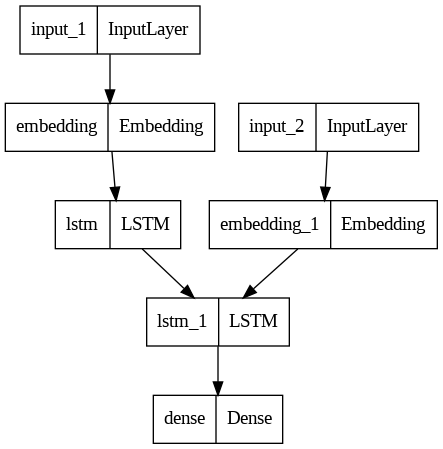

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [23]:
target_onehot_encoded = np.zeros((len(input_sentence), max_output_sen, 572), dtype = 'float32')

In [24]:
target_onehot_encoded.shape

(207, 13, 572)

In [25]:
for i, d in enumerate(decoder_output_sequence):
  for a, word in enumerate(d):
    target_onehot_encoded[i, a, word] = 1

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit([encoder_input_sequence, decoder_input_seq], target_onehot_encoded, epochs=5000, batch_size=64)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 14ms/step - loss: 2.3178e-05 - accuracy: 1.0000
Epoch 2502/5000
4/4 [==============================] - 0s 14ms/step - loss: 2.3130e-05 - accuracy: 1.0000
Epoch 2503/5000
4/4 [==============================] - 0s 13ms/step - loss: 2.3084e-05 - accuracy: 1.0000
Epoch 2504/5000
4/4 [==============================] - 0s 13ms/step - loss: 2.3038e-05 - accuracy: 1.0000
Epoch 2505/5000
4/4 [==============================] - 0s 14ms/step - loss: 2.2994e-05 - accuracy: 1.0000
Epoch 2506/5000
4/4 [==============================] - 0s 13ms/step - loss: 2.2947e-05 - accuracy: 1.0000
Epoch 2507/5000
4/4 [==============================] - 0s 15ms/step - loss: 2.2904e-05 - accuracy: 1.0000
Epoch 2508/5000
4/4 [==============================] - 0s 15ms/step - loss: 2.2859e-05 - accuracy: 1.0000
Epoch 2509/5000
4/4 [==============================] - 0s 14ms/step - loss: 2.2813e-05 - accuracy: 1.0000
Epoch 2510/

In [28]:
model.save('/content/drive/MyDrive/Colab Notebooks/GEN_AI-Intern/Text-Generation/Translator-TF-sratch/translator.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
model.predict([])

KeyError: ignored